# Machine Learning models on Mismatch Response data

In this notebook: 
- Necessary imports
- SVM model 
- Logistic Regression model
- Decision Tree model

## Imports

In [1]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import seaborn as sn
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import helper_functions as hf # library useful for eeg and erp data cleaning
import epod_helper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

In [2]:
df = pd.read_csv('df_avg_mmr.csv', sep = ',')
df.head()

,Group_AccToParents,mean_AF4,mean_FC5,mean_O1,mean_PO4,mean_Pz,std_AF4,std_FC5,std_O1,std_PO4,...,sur_Pz,zero_AF4,zero_FC5,zero_O1,zero_PO4,zero_Pz,ParticipantID,test,sex,age_months
0,1,-1.117406e-06,-6.776742e-07,-5.976661e-07,-2.431471e-06,-1.670712e-06,0.000001,1.019953e-06,0.000002,0.000002,...,-0.003422,11,9,10,5,1,101,a,1,20
1,1,-4.819496e-07,-1.517147e-06,1.613725e-05,3.867000e-06,4.153652e-06,0.000002,2.198310e-06,0.000016,0.000003,...,0.008508,15,18,5,7,12,103,a,0,20
2,1,-6.350983e-07,-3.097631e-07,5.055879e-07,1.914926e-07,-2.296004e-07,0.000001,7.629572e-07,0.000001,0.000002,...,-0.000471,15,14,19,12,15,104,a,1,18
3,1,3.254148e-06,2.082464e-06,4.316986e-06,-6.360535e-07,8.545349e-07,0.000004,2.365847e-06,0.000003,0.000001,...,0.001750,7,9,7,14,13,105,a,0,17
4,1,-2.109778e-07,-1.575644e-06,3.118421e-07,9.674898e-07,9.443440e-07,0.000002,1.672483e-06,0.000002,0.000002,...,0.001934,16,7,17,9,13,106,a,1,19


In [3]:
dfcor = df.corr()

In [4]:
dfcor

,Group_AccToParents,mean_AF4,mean_FC5,mean_O1,mean_PO4,mean_Pz,std_AF4,std_FC5,std_O1,std_PO4,...,sur_PO4,sur_Pz,zero_AF4,zero_FC5,zero_O1,zero_PO4,zero_Pz,ParticipantID,sex,age_months
Group_AccToParents,1.000000,0.197095,0.190159,0.182396,0.204105,0.182788,0.109051,-0.105962,0.141720,0.153155,...,0.204116,0.182794,-0.147939,0.187779,0.020326,0.076350,-0.044476,-0.230919,-0.070251,0.076087
mean_AF4,0.197095,1.000000,0.661267,0.226280,0.289763,0.397293,-0.026664,-0.216138,0.120085,-0.044002,...,0.289748,0.397305,0.112779,0.086378,0.103183,-0.043474,-0.096997,0.062855,0.066670,-0.075990
mean_FC5,0.190159,0.661267,1.000000,0.241554,0.295107,0.198768,-0.063548,-0.418306,-0.044752,-0.146672,...,0.295138,0.198811,0.148350,0.221862,0.109956,-0.048042,0.012942,0.112589,-0.010318,-0.182217
mean_O1,0.182396,0.226280,0.241554,1.000000,0.573529,0.531543,0.045207,0.178933,0.173380,0.065728,...,0.573599,0.531620,-0.055953,0.058808,-0.056907,-0.102676,-0.030490,-0.109007,-0.013585,0.169934
mean_PO4,0.204105,0.289763,0.295107,0.573529,1.000000,0.659145,-0.150262,0.004477,0.081210,-0.062532,...,1.000000,0.659147,-0.002667,0.066071,-0.051777,-0.110205,0.056619,-0.118851,0.051259,0.073721
mean_Pz,0.182788,0.397293,0.198768,0.531543,0.659145,1.000000,0.061552,0.046864,0.252979,0.075079,...,0.659087,1.000000,-0.091554,-0.063975,-0.030791,-0.094972,-0.096979,-0.038613,0.140981,-0.076181
std_AF4,0.109051,-0.026664,-0.063548,0.045207,-0.150262,0.061552,1.000000,0.569919,0.249322,0.456250,...,-0.150305,0.061551,-0.355521,-0.181595,-0.018727,-0.063866,0.034250,-0.022457,-0.173474,-0.018364
std_FC5,-0.105962,-0.216138,-0.418306,0.178933,0.004477,0.046864,0.569919,1.000000,0.125497,0.211688,...,0.004421,0.046804,-0.171281,-0.350448,-0.080758,-0.018608,-0.012505,-0.070729,-0.143108,0.162388
std_O1,0.141720,0.120085,-0.044752,0.173380,0.081210,0.252979,0.249322,0.125497,1.000000,0.542458,...,0.081115,0.252945,0.024894,0.089680,-0.265734,-0.120089,-0.027435,-0.147784,-0.154512,-0.053243
std_PO4,0.153155,-0.044002,-0.146672,0.065728,-0.062532,0.075079,0.456250,0.211688,0.542458,1.000000,...,-0.062502,0.075115,-0.254126,0.087487,-0.088387,-0.453140,-0.129912,0.123857,-0.186028,0.069905


In [5]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dfcor, 50))

Top Absolute Correlations
mean_O1   sur_O1      1.000000
mean_Pz   sur_Pz      1.000000
mean_PO4  sur_PO4     1.000000
mean_FC5  sur_FC5     1.000000
mean_AF4  sur_AF4     1.000000
mean_FC5  sur_AF4     0.876218
sur_AF4   sur_FC5     0.876209
mean_AF4  mean_FC5    0.876172
          sur_FC5     0.876163
mean_PO4  sur_Pz      0.858101
          mean_Pz     0.858095
sur_PO4   sur_Pz      0.858072
mean_Pz   sur_PO4     0.858066
sur_O1    sur_PO4     0.805296
mean_O1   sur_PO4     0.805273
mean_PO4  sur_O1      0.805266
mean_O1   mean_PO4    0.805242
sur_O1    sur_Pz      0.773137
mean_O1   sur_Pz      0.773119
mean_Pz   sur_O1      0.773093
mean_O1   mean_Pz     0.773075
std_AF4   std_FC5     0.762055
std_FC5   sur_FC5     0.743242
mean_FC5  std_FC5     0.743227
std_O1    std_PO4     0.739230
std_Pz    zero_Pz     0.709636
std_AF4   std_PO4     0.702403
std_FC5   zero_FC5    0.679609
std_Pz    zero_AF4    0.677363
std_AF4   zero_AF4    0.670304
std_PO4   zero_PO4    0.662179
          std

## Split data

In [6]:
y = df['Group_AccToParents'].values # dependent variable
X = df.drop(['Group_AccToParents','ParticipantID', 'test',
       'sex', 'age_months'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
X.columns

Index(['mean_AF4', 'mean_FC5', 'mean_O1', 'mean_PO4', 'mean_Pz', 'std_AF4',
       'std_FC5', 'std_O1', 'std_PO4', 'std_Pz', 'sur_AF4', 'sur_FC5',
       'sur_O1', 'sur_PO4', 'sur_Pz', 'zero_AF4', 'zero_FC5', 'zero_O1',
       'zero_PO4', 'zero_Pz'],
      dtype='object')

## Scale data

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## SVM model

In [9]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 1]}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [10]:
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [11]:
clf.score(X_train, y_train)

0.5333333333333333

In [12]:
svm = SVC(C=1, kernel='linear', random_state=False)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=False)

In [13]:
y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.634


In [14]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

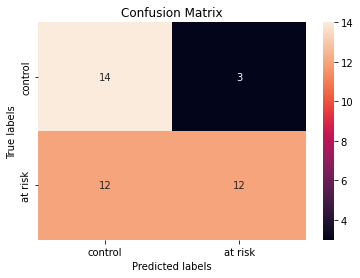

In [15]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [16]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model = svm
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.5294117647058824, 0.5882352941176471, 0.5294117647058824, 0.5882352941176471, 0.23529411764705882, 0.75]
Avg accuracy : 0.5367647058823529


## Logistic Regression model

In [17]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
y_pred = lr.predict(X_test)

In [19]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.688


In [20]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1])

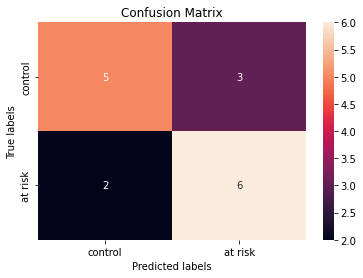

In [21]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [22]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle = True, random_state=None)
model = lr
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.47058823529411764, 0.6470588235294118, 0.47058823529411764, 0.5882352941176471, 0.5882352941176471, 0.5]
Avg accuracy : 0.5441176470588236


## Decision Tree model

In [24]:
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [25]:
y_pred = dt.predict(X_test)

In [26]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.500


In [27]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1])

[Text(0.6907894736842105, 0.9166666666666666, 'X[19] <= 15.5\ngini = 0.498\nsamples = 85\nvalue = [40, 45]'),
 Text(0.4868421052631579, 0.75, 'X[10] <= 0.006\ngini = 0.496\nsamples = 68\nvalue = [37, 31]'),
 Text(0.34210526315789475, 0.5833333333333334, 'X[16] <= 21.5\ngini = 0.484\nsamples = 61\nvalue = [36, 25]'),
 Text(0.21052631578947367, 0.4166666666666667, 'X[8] <= 0.0\ngini = 0.463\nsamples = 55\nvalue = [35, 20]'),
 Text(0.10526315789473684, 0.25, 'X[6] <= 0.0\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.397\nsamples = 44\nvalue = [32, 12]'),
 Text(0.3157894736842105, 0.25, 'X[15] <= 11.0\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2631578947368421, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3684210526315789, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4736

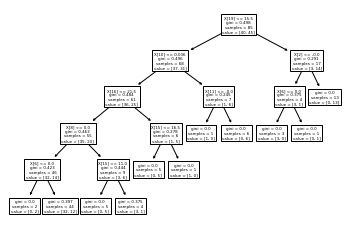

In [28]:
tree.plot_tree(dt)

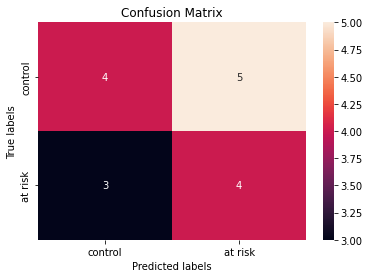

In [29]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [30]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model = tree.DecisionTreeClassifier(max_depth=5)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.17647058823529413, 0.47058823529411764, 0.5882352941176471, 0.5294117647058824, 0.4117647058823529, 0.4375]
Avg accuracy : 0.4356617647058823


## CNN

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0])